# Predict Fuel Efficiency
Here we will use one of the famous datasets among machine learning practitioners, Auto MPG dataset to create a model to predict fuel efficiency of vehicles in the late 1970s and early 1980s. To do this, we will provide the model with a description of many automobiles from this period. This description includes attributes such as cylinders, displacement, horsepower and weight.

[Source link](https://thecleverprogrammer.com/2020/09/02/predict-fuel-efficiency-with-machine-learning/)

## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
df = pd.read_csv("data/auto.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Dateset info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## Preprocessing the data

Convert the "horsepower" values to numerical values

In [4]:
# df["horsepower"] = df["horsepower"].astype("float")
## When converting this column to float the following error raised:
## ValueError: could not convert string to float: '?'

Drop the rows with "horsepower"=="?" and then convert it to numerical.  
Also drop the "car name" column.

In [5]:
df = df.loc[df["horsepower"] != "?", :]
df["horsepower"] = df["horsepower"].astype("float")
df = df.drop(columns=["car name"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Visualizing the dataset

### Distribution of regions

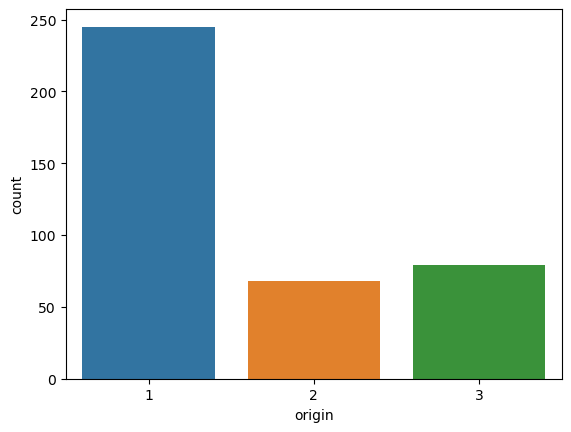

In [7]:
sns.countplot(df, x="origin");
# According to the dataset info origin 1 is USA, 2 is Europe, 3 is Japan

### Pairplot of all features

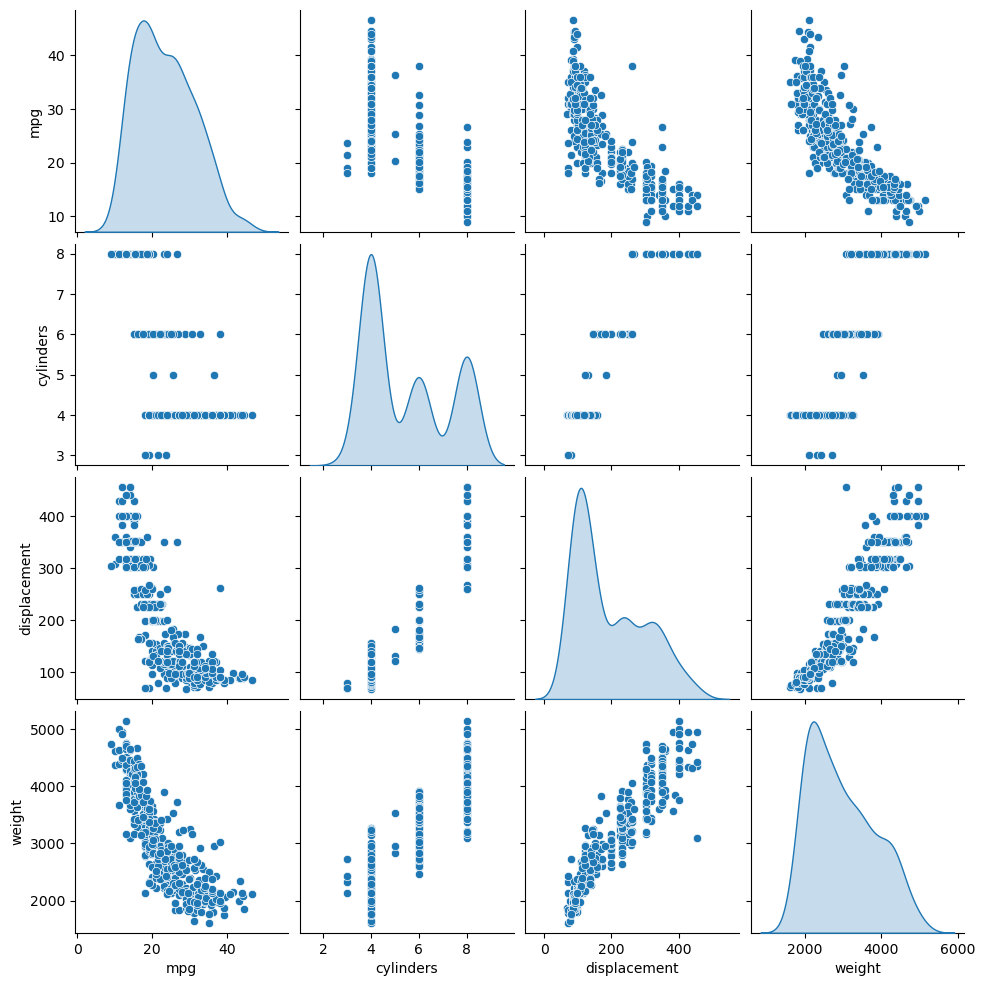

In [8]:
sns.pairplot(df[["mpg", "cylinders", "displacement", "weight"]], diag_kind="kde");

## Matrix of features and labels

In [9]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

print(f"X {X.shape}")
print(f"y {y.shape}")

print(f"\nFirst five rows of X: \n{X[:5, :]}")
print(f"\nFirst five rows of y: \n{y[:5]}")

X (392, 7)
y (392,)

First five rows of X: 
[[8.000e+00 3.070e+02 1.300e+02 3.504e+03 1.200e+01 7.000e+01 1.000e+00]
 [8.000e+00 3.500e+02 1.650e+02 3.693e+03 1.150e+01 7.000e+01 1.000e+00]
 [8.000e+00 3.180e+02 1.500e+02 3.436e+03 1.100e+01 7.000e+01 1.000e+00]
 [8.000e+00 3.040e+02 1.500e+02 3.433e+03 1.200e+01 7.000e+01 1.000e+00]
 [8.000e+00 3.020e+02 1.400e+02 3.449e+03 1.050e+01 7.000e+01 1.000e+00]]

First five rows of y: 
[18. 15. 18. 16. 17.]


## Splitting the dataset to train set and test set

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (313, 7)
X_test (79, 7)
y_train (313,)
y_test (79,)


## Scaling the matrix of features

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(f"\nFirst five rows of scaled X_train: \n{X_train[:5, :]}")
print(f"\nFirst five rows of scaled X_test : \n{X_test[:5, :]}")


First five rows of scaled X_train: 
[[-0.8576193  -1.04611368 -0.8984236  -1.22322883  0.44574133  0.25439532
   1.7445813 ]
 [ 0.32752348  0.31263257 -0.1059203   0.54506995  0.58957333  0.52802327
  -0.72067354]
 [-0.8576193  -0.85200708 -0.8984236  -0.91958156 -0.84874664  0.80165122
  -0.72067354]
 [ 0.32752348  0.06999931 -0.60783906  0.04732659  0.73340532 -0.01923264
  -0.72067354]
 [-0.8576193  -0.77436443 -0.23800419 -0.82670122 -0.02171266 -1.11374445
   1.7445813 ]]

First five rows of scaled X_test : 
[[-0.8576193  -0.99758703 -0.76633972 -1.00888958 -0.38129265 -0.56648854
  -0.72067354]
 [-0.8576193  -0.51232051 -0.42292162 -0.09794779  0.62553132  0.80165122
  -0.72067354]
 [ 1.51266626  1.52579886  1.47908629  1.76680366 -0.74087264 -1.11374445
  -0.72067354]
 [-0.8576193  -0.85200708 -1.08334104 -1.00888958 -0.30937665  1.62253508
  -0.72067354]
 [-0.8576193  -0.92964972 -0.97767393 -0.98507411  0.87723732  1.07527918
   1.7445813 ]]


## Training the Random Forest Regression model

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

## Predicting the test set

In [13]:
y_pred = regressor.predict(X_test)
pd.options.display.precision = 2
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred})
result.head(10)

,Actual,Predict
0,28.0,27.95
1,22.3,25.73
2,12.0,13.28
3,38.0,35.35
4,33.8,35.80
5,19.4,20.39
6,38.1,35.10
7,30.0,31.48
8,20.0,18.67
9,20.0,25.00


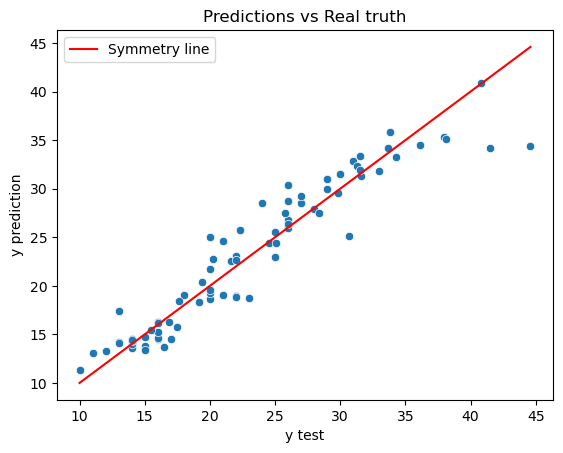

In [14]:
symmetry_line = [y_test.min(), y_test.max()]

sns.scatterplot(x=y_test, y=y_pred)
plt.plot(symmetry_line, symmetry_line, color="red", label="Symmetry line")
plt.xlabel("y test")
plt.ylabel("y prediction")
plt.title("Predictions vs Real truth")
plt.legend()
plt.plot();

## Plotting the residuals

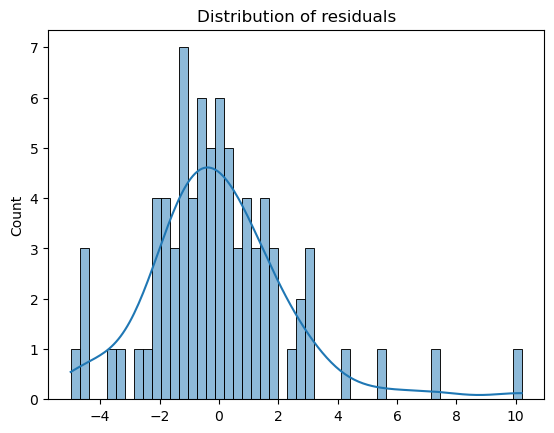

In [15]:
sns.histplot((y_test-y_pred), bins=50, kde=True)
plt.title("Distribution of residuals");

## Evaluating the model

In [16]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"The R2 score of the model: {r2:.3f}")
print(f"The mse of the model: {mse:.3f}")

The R2 score of the model: 0.906
The mse of the model: 5.820
